In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('E:\CodSoft\CODSOFT\Task_01_Titanic_Survivorship_Prediction\Titanic-Dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\pc tec\AppData\Local\Temp\ipykernel_10852\2956619088.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('E:\CodSoft\CODSOFT\Task_01_Titanic_Survivorship_Prediction\Titanic-Dataset.csv')


Exploring the Data

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(df.shape)

(891, 12)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print(df.duplicated().sum())


0


In [8]:
print(df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [9]:
df.isnull().sum()/len(df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Text(0.5, 1.0, 'Missing values heatmap')

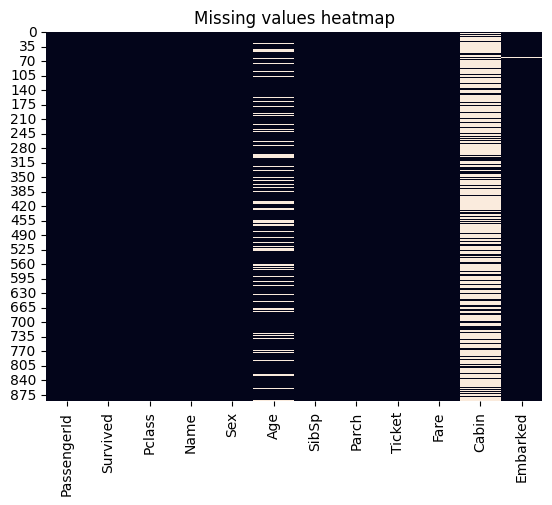

In [10]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [11]:
# Find columns with more than 75% missing values
column_to_delete = df.columns[(df.isnull().sum() / len(df) * 100) > 75]

# Drop columns with more than 75% missing values
df = df.drop(columns=column_to_delete)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
age_mean_per_sex=df.groupby("Sex")["Age"].mean()
age_mean_per_sex

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [13]:
df['Age'].mean()

29.69911764705882

In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df

C:\Users\pc tec\AppData\Local\Temp\ipykernel_10852\1943981980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Data Analysis and Visualization

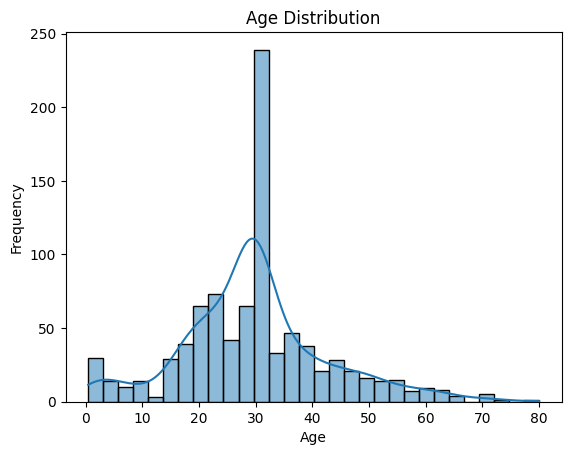

In [15]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [16]:
gender_count = df["Sex"].value_counts()
print("Counts of male/ female on the titanic")
print(gender_count)
print("\n")
print("Percentage of male/ female on the titanic")
print(df["Sex"].value_counts()/len(df)*100)
print()

Counts of male/ female on the titanic
Sex
male      577
female    314
Name: count, dtype: int64


Percentage of male/ female on the titanic
Sex
male      64.758698
female    35.241302
Name: count, dtype: float64



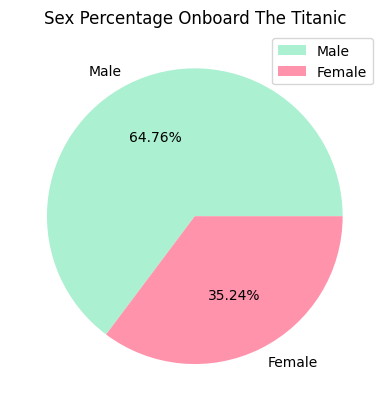

In [17]:
plt.pie(gender_count, labels=['Male', 'Female'],autopct='%.2f%%', colors=['#aaf0d1','#ff93ac'])
plt.legend()
plt.title('Sex Percentage Onboard The Titanic')
plt.show()

In [18]:

survivors_per_pclass = df.groupby('Pclass')['Survived'].value_counts().reset_index()

survivors_per_pclass


,Pclass,Survived,count
0,1,1,136
1,1,0,80
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


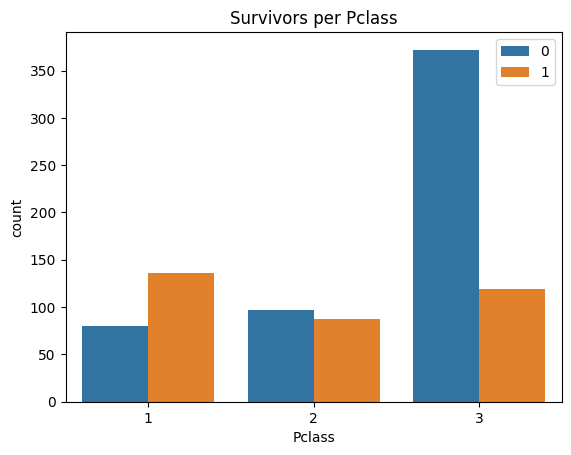

In [19]:

sns.barplot(data=survivors_per_pclass, x=survivors_per_pclass['Pclass'], y=survivors_per_pclass['count'], hue=survivors_per_pclass['Survived'])
plt.title("Survivors per Pclass")
plt.legend()
plt.show()

In [20]:

df['Age_Group'] = pd.cut(df['Age'], bins=np.arange(0, df['Age'].max() + 20, 20), right=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,"[20.0, 40.0)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,"[20.0, 40.0)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,"[20.0, 40.0)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,"[20.0, 40.0)"
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,"[20.0, 40.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,"[20.0, 40.0)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,"[0.0, 20.0)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,"[20.0, 40.0)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,"[20.0, 40.0)"


In [21]:
survivors_per_age = df.groupby('Age_Group')['Survived'].value_counts().reset_index()
survivors_per_age

C:\Users\pc tec\AppData\Local\Temp\ipykernel_10852\2512587074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_per_age = df.groupby('Age_Group')['Survived'].value_counts().reset_index()


,Age_Group,Survived,count
0,"[0.0, 20.0)",0,85
1,"[0.0, 20.0)",1,79
2,"[20.0, 40.0)",0,362
3,"[20.0, 40.0)",1,202
4,"[40.0, 60.0)",0,83
5,"[40.0, 60.0)",1,54
6,"[60.0, 80.0)",0,19
7,"[60.0, 80.0)",1,6


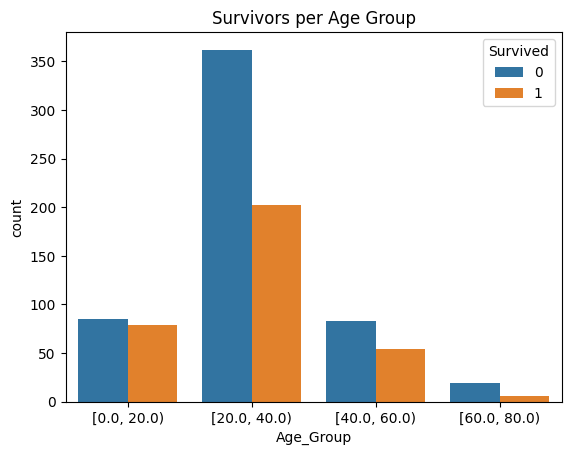

In [22]:
sns.barplot(data=survivors_per_age, x= survivors_per_age['Age_Group'], y=survivors_per_age['count'], hue=survivors_per_age['Survived'])
plt.title('Survivors per Age Group')
plt.show()

In [23]:
survivors_per_embarked = df.groupby('Embarked')['Survived'].value_counts().reset_index()
survivors_per_embarked

,Embarked,Survived,count
0,C,1,93
1,C,0,75
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


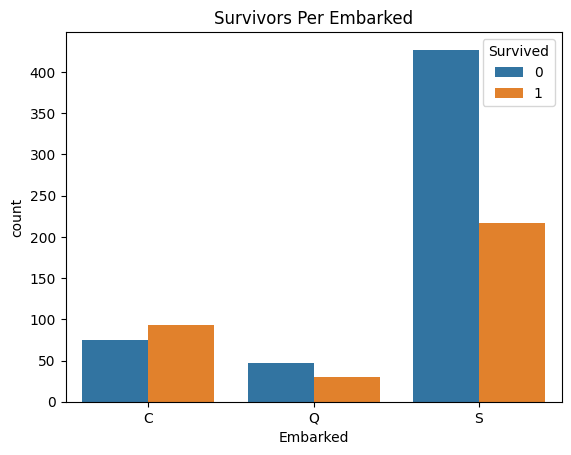

In [24]:
sns.barplot(data=survivors_per_embarked, x= survivors_per_embarked['Embarked'], y=survivors_per_embarked['count'], hue=survivors_per_embarked['Survived'])
plt.title("Survivors Per Embarked")
plt.show()

In [25]:
survived_per_sex =  df.groupby('Sex')['Survived'].value_counts().reset_index()

survived_per_sex

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


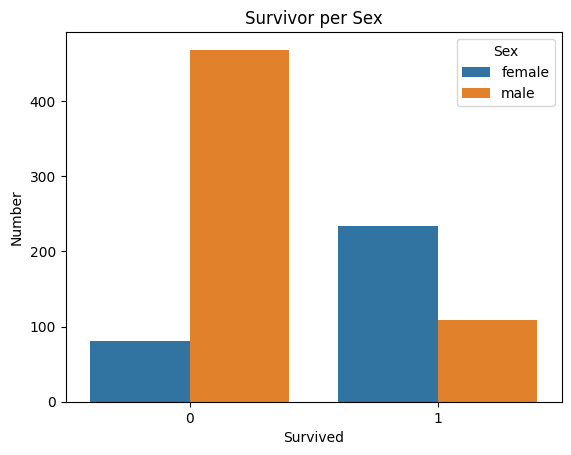

In [26]:

sns.barplot(data=survived_per_sex , x=survived_per_sex['Survived'], y=survived_per_sex['count'], hue=survived_per_sex['Sex'])

plt.title('Survivor per Sex')
plt.xlabel('Survived')
plt.ylabel('Number')
plt.show()

In [27]:
nbSib = df['SibSp'].value_counts().reset_index()
nbSib

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


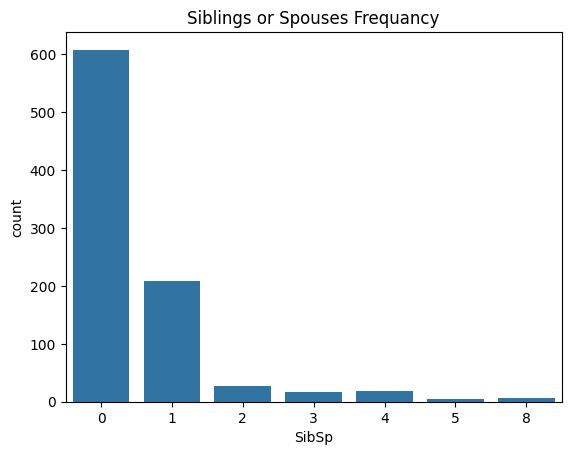

In [28]:
sns.barplot(x=nbSib['SibSp'], y=nbSib['count'])
plt.title('Siblings or Spouses Frequancy')
plt.show()

In [29]:
nbPar = df['Parch'].value_counts().reset_index()
nbPar

,Parch,count
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


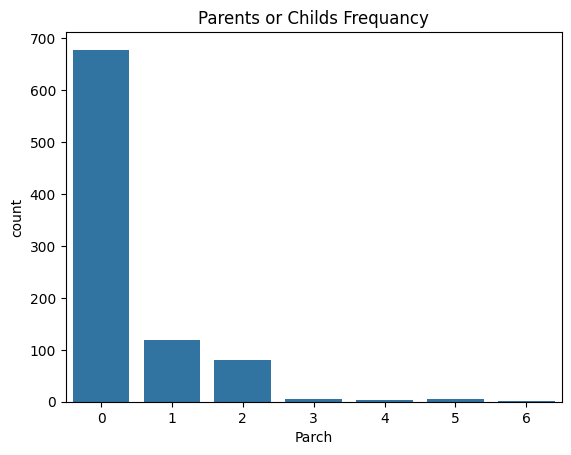

In [30]:
sns.barplot(x=nbPar['Parch'], y=nbPar['count'])
plt.title('Parents or Childs Frequancy')
plt.show()

In [31]:

survived_per_parch = df.groupby('Parch')['Survived'].value_counts().reset_index()
survived_per_parch

,Parch,Survived,count
0,0,0,445
1,0,1,233
2,1,1,65
3,1,0,53
4,2,0,40
5,2,1,40
6,3,1,3
7,3,0,2
8,4,0,4
9,5,0,4


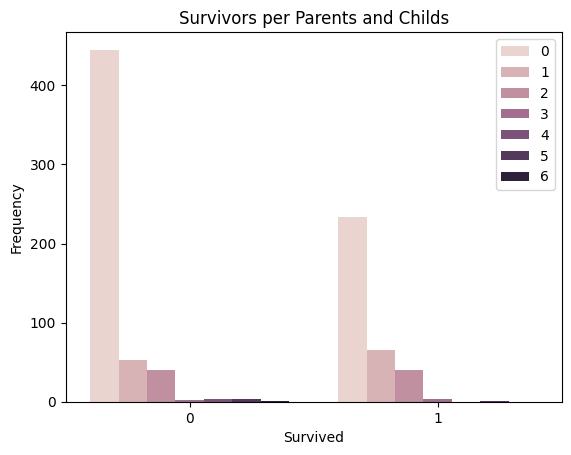

In [32]:
sns.barplot(data=survived_per_parch , x=survived_per_parch['Survived'], y=survived_per_parch['count'], hue=survived_per_parch['Parch'])
plt.title('Survivors per Parents and Childs')
plt.legend()
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [33]:
survived_per_sib = df[['Survived', 'SibSp']].value_counts().reset_index()
survived_per_sib

,Survived,SibSp,count
0,0,0,398
1,1,0,210
2,1,1,112
3,0,1,97
4,0,2,15
5,0,4,15
6,1,2,13
7,0,3,12
8,0,8,7
9,0,5,5


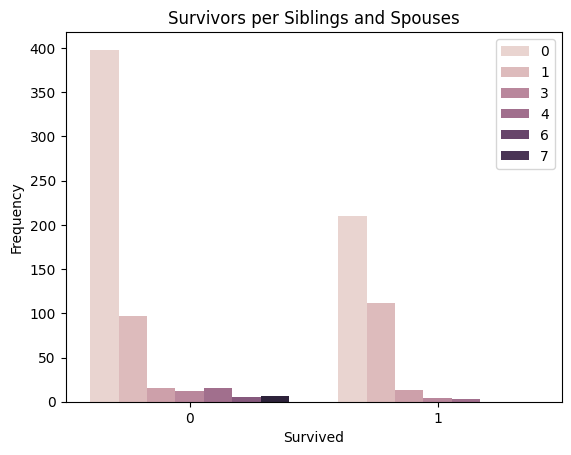

In [34]:

sns.barplot(data=survived_per_sib , x=survived_per_sib['Survived'], y=survived_per_sib['count'], hue=survived_per_sib['SibSp'])
plt.title('Survivors per Siblings and Spouses')
plt.legend(loc='upper right')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

Model Selection and Building

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"[20.0, 40.0)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"[20.0, 40.0)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"[20.0, 40.0)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"[20.0, 40.0)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"[20.0, 40.0)"


In [36]:
test = df.drop(['PassengerId','Name','Ticket','Age_Group'], axis=1)
test2 = df.drop(['PassengerId','Name','Ticket','Parch','Age_Group'], axis=1)
print(test.head())
print(test2.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Survived  Pclass     Sex   Age  SibSp     Fare Embarked
0         0       3    male  22.0      1   7.2500        S
1         1       1  female  38.0      1  71.2833        C
2         1       3  female  26.0      0   7.9250        S
3         1       1  female  35.0      1  53.1000        S
4         0       3    male  35.0      0   8.0500        S


In [37]:
label_encoder = LabelEncoder()

In [38]:
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])
test2['Sex'] = label_encoder.fit_transform(test['Sex'])
test2['Embarked'] = label_encoder.fit_transform(test['Embarked'])

In [39]:
print(test.head())
print(test2.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2
   Survived  Pclass  Sex   Age  SibSp     Fare  Embarked
0         0       3    1  22.0      1   7.2500         2
1         1       1    0  38.0      1  71.2833         0
2         1       3    0  26.0      0   7.9250         2
3         1       1    0  35.0      1  53.1000         2
4         0       3    1  35.0      0   8.0500         2


In [40]:
x= test.drop('Survived', axis=1)
y = test['Survived']

x2= test.drop('Survived', axis=1)
y2 = test['Survived']

In [41]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)
X_train2, x_test2, Y_train2, y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=11)


1-Logistic Regression

In [42]:

clf = LogisticRegression() 

In [43]:
clf.fit(X_train,Y_train)


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
print(clf.score(X_train,Y_train))
print(clf.score(x_test,y_test))

0.7823033707865169
0.8715083798882681


In [45]:
clf.fit(X_train2,Y_train2)


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
print(clf.score(X_train2,Y_train2) *100)
print(clf.score(x_test2,y_test2)*100)

78.23033707865169
87.15083798882681


2-Naive Bayes (Gaussian)

In [50]:
clf2 = GaussianNB()
clf2.fit(X_train,  Y_train)

print(clf2.score(X_train2,Y_train2) *100)
print(clf2.score(x_test,y_test)*100)

77.9494382022472
84.91620111731844


3- Random Forest

In [51]:
clf3 = RandomForestClassifier()
clf3.fit(X_train,  Y_train)

RandomForestClassifier()

In [52]:
print(clf3.score(X_train2,Y_train2) *100)
print(clf3.score(x_test,y_test)*100)

98.31460674157303
83.24022346368714


Thank You